In [76]:
"""Evaluating Models"""

# source code : https://github.com/Audhil/tensorflow_cookbook/blob/master/02_TensorFlow_Way/08_Evaluating_Models/08_evaluating_models.ipynb

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [77]:
"""Regression Model"""

"""For the regression model we will generate 100 random samples from a Normal(mean=1, sd=0.1). 
The target will be an array of size 100 filled with the target value of 10.0.
We will fit the linear model $y=A \cdot x$ (no y intercept). The theoretical value of A is 10.0."""

'For the regression model we will generate 100 random samples from a Normal(mean=1, sd=0.1). \nThe target will be an array of size 100 filled with the target value of 10.0.\nWe will fit the linear model $y=A \\cdot x$ (no y intercept). The theoretical value of A is 10.0.'

In [78]:
batch_size = 25
learning_rate = .02
epochs = 1000


In [79]:
"""Generate Data for Regression
Here we generate the data required for the regression. We also specify the necessary placeholders.
After we split the data into a 80-20 train-test split."""

# Create data
x_vals = np.random.normal(1, 0.1, 100)
y_vals = np.repeat(10., 100)

# Split data into train/test = 80%/20%
train_indices = np.random.choice(len(x_vals), round(len(x_vals) * .8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]

# place holders
x_place_holder = tf.placeholder(dtype=tf.float32, shape=[None, 1])
y_place_holder = tf.placeholder(dtype=tf.float32, shape=[None, 1])

# Variable
A = tf.Variable(tf.random_normal(shape=[1, 1]))

# model
model = tf.matmul(x_place_holder, A)

# loss function
# L2 loss
loss = tf.reduce_mean(tf.square(tf.subtract(model, y_place_holder)))

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

init_vars = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init_vars)
    for i in range(epochs):
        rand_index = np.random.choice(len(x_vals_train), size=batch_size)
        rand_x = np.transpose([x_vals_train[rand_index]])
        rand_y = np.transpose([y_vals_train[rand_index]])
        sess.run(optimizer, feed_dict={x_place_holder: rand_x, y_place_holder: rand_y})
        if (i + 1) % 25 == 0:
            print('Step #' + str(i + 1) + ' A = ' + str(sess.run(A)))
            print('Loss = ' + str(sess.run(loss, feed_dict={x_place_holder: rand_x, y_place_holder: rand_y})))


Step #25 A = [[ 6.79948568]]
Loss = 10.3066
Step #50 A = [[ 8.84168816]]
Loss = 1.34861
Step #75 A = [[ 9.57591248]]
Loss = 1.20772
Step #100 A = [[ 9.82526588]]
Loss = 0.514096
Step #125 A = [[ 9.91490555]]
Loss = 0.572136
Step #150 A = [[ 9.95020294]]
Loss = 1.32269
Step #175 A = [[ 9.97117138]]
Loss = 1.13945
Step #200 A = [[ 9.97158527]]
Loss = 0.47447
Step #225 A = [[ 10.00874519]]
Loss = 1.17678
Step #250 A = [[ 10.02682114]]
Loss = 0.76478
Step #275 A = [[ 9.97177792]]
Loss = 0.84327
Step #300 A = [[ 9.95977497]]
Loss = 1.01776
Step #325 A = [[ 9.92786503]]
Loss = 0.453751
Step #350 A = [[ 9.96060181]]
Loss = 0.677054
Step #375 A = [[ 9.95635319]]
Loss = 0.753239
Step #400 A = [[ 9.98184586]]
Loss = 0.624961
Step #425 A = [[ 9.99627399]]
Loss = 0.999815
Step #450 A = [[ 10.00660801]]
Loss = 0.686894
Step #475 A = [[ 9.97324085]]
Loss = 0.634348
Step #500 A = [[ 10.0066576]]
Loss = 0.762524
Step #525 A = [[ 10.03481865]]
Loss = 0.686287


Step #550 A = [[ 10.01509476]]
Loss = 0.826554
Step #575 A = [[ 10.03890419]]
Loss = 1.0503
Step #600 A = [[ 10.07072735]]
Loss = 0.652695
Step #625 A = [[ 10.03097916]]
Loss = 0.617692
Step #650 A = [[ 10.00998592]]
Loss = 0.589343
Step #675 A = [[ 10.04493809]]
Loss = 0.717396
Step #700 A = [[ 10.04192257]]
Loss = 1.21304
Step #725 A = [[ 9.99537659]]
Loss = 0.924513
Step #750 A = [[ 9.97947121]]
Loss = 0.790202
Step #775 A = [[ 10.00146675]]
Loss = 0.598803
Step #800 A = [[ 10.01720428]]
Loss = 0.462609
Step #825 A = [[ 10.05621052]]
Loss = 0.769973
Step #850 A = [[ 10.01642704]]
Loss = 0.72248
Step #875 A = [[ 10.0206871]]
Loss = 1.09169
Step #900 A = [[ 10.02209473]]
Loss = 0.710216
Step #925 A = [[ 10.01005363]]
Loss = 1.03608
Step #950 A = [[ 9.97808075]]
Loss = 0.79885
Step #975 A = [[ 9.988451]]
Loss = 0.818484
Step #1000 A = [[ 10.0209198]]
Loss = 0.757188


In [80]:
"""Evaluating the Regression model"""
# For the regression model evaluation, we will run the loss wih the training and test set.

# Evaluate accuracy (loss) on test set
with tf.Session() as sess:
    sess.run(init_vars)
    mse_train = sess.run(loss, feed_dict={x_place_holder: np.transpose([x_vals_train]),
                                          y_place_holder: np.transpose([y_vals_train])})

    mse_test = sess.run(loss, feed_dict={x_place_holder: np.transpose([x_vals_test]),
                                         y_place_holder: np.transpose([y_vals_test])})

    print('MSE on train : ', str(np.round(mse_train, 2) / 100))
    print('MSE on test : ', str(np.round(mse_test, 2) / 100))


MSE on train :  0.885299987793
MSE on test :  0.884499969482


Classification Example

For the classification example, we generate data as follows:
The input data will be a sample of size 50 from a Normal(mean = -1, sd = 1) and a sample of 50 from a Normal(mean = 1, sd = 1).
The target data will be 50 values of 0 and 50 values of 1.
We fit the binary classification model:
If $sigmoid(x+A)&lt;0.5$ Then we predict class 0
If $sigmoid(x+A)&gt;=0.5$ Then we predict class 1
Theoretically A should be
$$ - \frac{mean1 + mean2}{2} = 0$$

Step #200 A = [ 4.75223684]
Loss = 2.75295
Step #400 A = [ 1.03689408]
Loss = 0.553718
Step #600 A = [-0.02879105]
Loss = 0.220092


Step #800 A = [-0.23992744]
Loss = 0.242676
Step #1000 A = [-0.3415409]
Loss = 0.26192
Step #1200 A = [-0.29597193]
Loss = 0.351862


Step #1400 A = [-0.3221682]
Loss = 0.19834
Step #1600 A = [-0.31789702]
Loss = 0.247198
Step #1800 A = [-0.30745864]
Loss = 0.319557


Accuracy on train set: 0.9125
Accuracy on test set: 1.0


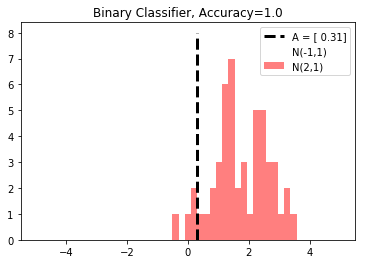

In [81]:
sess = tf.Session()
batch_size = 25

# Create data
x_vals = np.concatenate((np.random.normal(-1, 1, 50), np.random.normal(2, 1, 50)))
y_vals = np.concatenate((np.repeat(0., 50), np.repeat(1., 50)))
x_data = tf.placeholder(shape=[1, None], dtype=tf.float32)
y_target = tf.placeholder(shape=[1, None], dtype=tf.float32)

# Split data into train/test = 80%/20%
train_indices = np.random.choice(len(x_vals), round(len(x_vals) * 0.8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]

# Create variable (one model parameter = A)
A = tf.Variable(tf.random_normal(mean=10, shape=[1]))

# Add operation to graph
# Want to create the operstion sigmoid(x + A)
# Note, the sigmoid() part is in the loss function
my_output = tf.add(x_data, A)

# Add classification loss (cross entropy)
xentropy = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=my_output, labels=y_target))

# Create Optimizer
my_opt = tf.train.GradientDescentOptimizer(0.05)
train_step = my_opt.minimize(xentropy)

# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

# Run loop
for i in range(1800):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = [x_vals_train[rand_index]]
    rand_y = [y_vals_train[rand_index]]
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i + 1) % 200 == 0:
        print('Step #' + str(i + 1) + ' A = ' + str(sess.run(A)))
        print('Loss = ' + str(sess.run(xentropy, feed_dict={x_data: rand_x, y_target: rand_y})))

# evaluation of Classification
# Evaluate Predictions on test set
y_prediction = tf.squeeze(tf.round(tf.nn.sigmoid(tf.add(x_data, A))))
correct_prediction = tf.equal(y_prediction, y_target)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
acc_value_test = sess.run(accuracy, feed_dict={x_data: [x_vals_test], y_target: [y_vals_test]})
acc_value_train = sess.run(accuracy, feed_dict={x_data: [x_vals_train], y_target: [y_vals_train]})
print('Accuracy on train set: ' + str(acc_value_train))
print('Accuracy on test set: ' + str(acc_value_test))

# Plot classification result
A_result = -sess.run(A)
bins = np.linspace(-5, 5, 50)
plt.hist(x_vals[0:50], bins, alpha=0.5, label='N(-1,1)', color='white')
plt.hist(x_vals[50:100], bins[0:50], alpha=0.5, label='N(2,1)', color='red')
plt.plot((A_result, A_result), (0, 8), 'k--', linewidth=3, label='A = ' + str(np.round(A_result, 2)))
plt.legend(loc='upper right')
plt.title('Binary Classifier, Accuracy=' + str(np.round(acc_value_test, 2)))
plt.show()

sess.close()
